<a href="https://colab.research.google.com/github/Hemanth-stack/kaggle_competitions/blob/main/prediction_of_num_sold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder


def clean(train):
  train['date'] = pd.to_datetime(train['date'])


  train['day'] = train['date'].dt.day
  train['month'] = train['date'].dt.month
  train['year'] = train['date'].dt.year

  le = LabelEncoder()
  for i in ['country','store','product','year']:
    train[i] = le.fit_transform(train[i])
  return train





In [ ]:
train = clean(train)
test = clean(test)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    70128 non-null  int64         
 1   date      70128 non-null  datetime64[ns]
 2   country   70128 non-null  int64         
 3   store     70128 non-null  int64         
 4   product   70128 non-null  int64         
 5   num_sold  70128 non-null  int64         
 6   day       70128 non-null  int64         
 7   month     70128 non-null  int64         
 8   year      70128 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 4.8 MB


In [ ]:
features = ['country','store','product','day','month','year']

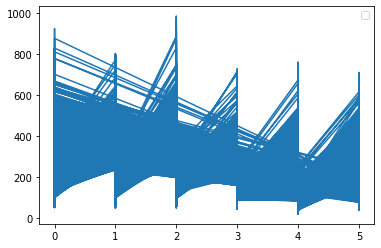

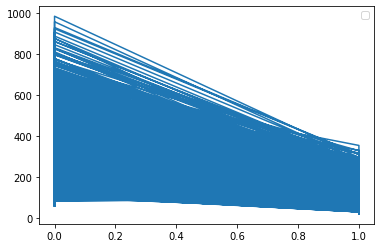

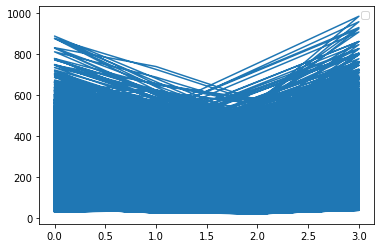

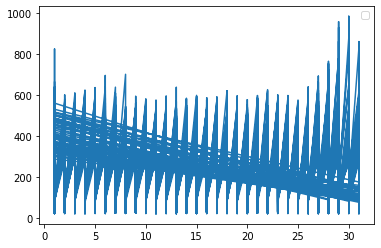

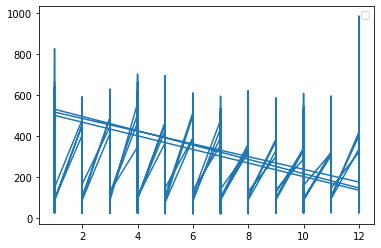

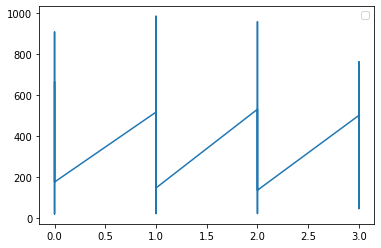

In [ ]:
import matplotlib.pyplot as plt

for i in features:
  plt.legend(i)
  plt.plot(train[i],train['num_sold'])
  plt.show()

In [ ]:
train[features]

,country,store,product,day,month,year
0,0,0,0,1,1,0
1,0,0,1,1,1,0
2,0,0,2,1,1,0
3,0,0,3,1,1,0
4,0,1,0,1,1,0
...,...,...,...,...,...,...
70123,5,0,3,31,12,3
70124,5,1,0,31,12,3
70125,5,1,1,31,12,3
70126,5,1,2,31,12,3


In [ ]:
print(set(train['country']))
print(set(train['store']))
print(set(train['product']))
print(set(train['day']))
print(set(train['month']))
print(set(train['year']))

{0, 1, 2, 3, 4, 5}
{0, 1}
{0, 1, 2, 3}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
{0, 1, 2, 3}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train[features]
y = train['num_sold']
train_x,val_x,train_y,val_y = train_test_split(X,y)

for i in [5000,6000,7000,8000,9000]:
  model = DecisionTreeRegressor(max_leaf_nodes=i,random_state=1)
  model.fit(train_x,train_y)
  prediction = list(map(int,model.predict(val_x)))
  print(accuracy_score(val_y,prediction))

0.02943189596167009
0.028861510381017568
0.028462240474560804
0.029089664613278575
0.029545973077800592


In [ ]:
print(len(train_x),len(train_y),len(val_x),len(val_y))

52596 52596 17532 17532


In [ ]:
predictions = list(map(int,model.predict(test[features])))

In [ ]:
sub.head()

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100


In [ ]:
test

,row_id,date,country,store,product,day,month,year
0,70128,2021-01-01,0,0,0,1,1,0
1,70129,2021-01-01,0,0,1,1,1,0
2,70130,2021-01-01,0,0,2,1,1,0
3,70131,2021-01-01,0,0,3,1,1,0
4,70132,2021-01-01,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...
17515,87643,2021-12-31,5,0,3,31,12,0
17516,87644,2021-12-31,5,1,0,31,12,0
17517,87645,2021-12-31,5,1,1,31,12,0
17518,87646,2021-12-31,5,1,2,31,12,0


In [ ]:
output = pd.DataFrame({'row_id':test.row_id,'num_sold':predictions})

In [ ]:
output.to_csv('output.csv',index=False)